Выполнить визуализацию многомерных данных, используя t-SNE.
Необходимо использовать свой набор многомерных данных (например, можно
использовать MNIST, fashion MNIST). Рассмотреть результаты визуализации
для разных значений перплексии.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import random
import seaborn as sns
import scipy.stats as sts
from sklearn.manifold import TSNE
from sklearn import preprocessing
import time
from umap import UMAP
import warnings
warnings.filterwarnings('ignore')

C:\Users\romas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_csv('riceClassification.csv', sep=',')

data = data.sample(1000)
D = data.drop(['id', 'Class'], axis=1)
scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(D), columns=D.columns)
D

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,0.817745,0.776044,0.845109,0.662348,0.757773,0.857316,0.398809,0.686950,0.740699,0.291303
1,0.816275,0.879309,0.733849,0.782280,0.754760,0.856122,0.831352,0.730193,0.606481,0.422322
2,0.442277,0.755495,0.338280,0.914776,0.409376,0.522979,0.415877,0.560211,0.299971,0.675368
3,0.442010,0.797730,0.301304,0.941759,0.405399,0.522716,0.192356,0.568017,0.277517,0.755634
4,0.873597,0.850060,0.836794,0.713059,0.801277,0.902153,0.859881,0.737536,0.692857,0.339882
...,...,...,...,...,...,...,...,...,...,...
995,0.416489,0.685080,0.355881,0.882733,0.382261,0.497359,0.145757,0.510457,0.381671,0.596709
996,0.792758,0.829292,0.757617,0.745086,0.744517,0.836912,0.775341,0.708728,0.624387,0.375316
997,0.646045,0.846010,0.533778,0.861945,0.594963,0.712333,0.274030,0.663745,0.460467,0.553034
998,0.762827,0.778869,0.758601,0.716252,0.715233,0.812175,0.371643,0.753937,0.440852,0.343232


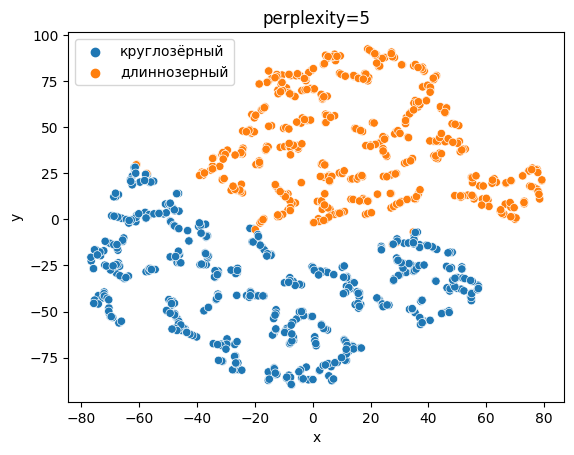

perplexity = 5 time = 13.265625


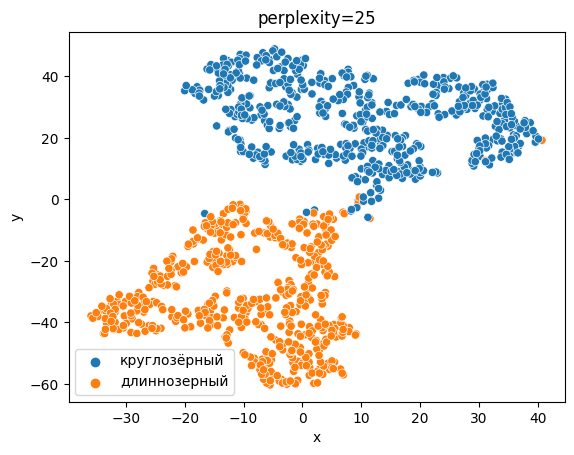

perplexity = 25 time = 16.296875


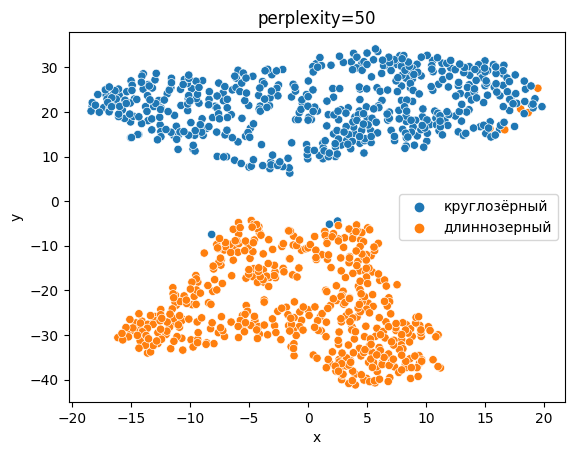

perplexity = 50 time = 20.546875


In [10]:
perplexity = [5, 25, 50]

def show(DATA,perplexity):
    T = TSNE(n_components=2, perplexity=perplexity, random_state=123)
    TSNE_features = T.fit_transform(DATA)
    t_data = DATA.copy()
    t_data['x'] = TSNE_features[:,0]
    t_data['y'] = TSNE_features[:,1]
    fig = plt.figure()
    plt.title(f'perplexity={perplexity}')
    sns.scatterplot(x='x', y='y', data=t_data, hue=['круглозёрный' if i == 1 else 'длиннозерный' for i in data['Class']])
    plt.show()

for i in perplexity:
    start = time.process_time()
    show(D,i)
    end = time.process_time()
    print(f'perplexity = {i} time = {end-start}')


Выполнить визуализацию многомерных данных, используя UMAP с
различными параметрами n_neighbors и min_dist. Рассчитать время работы
алгоритма с помощью библиотеки time и сравнить его с временем работы tSNE.

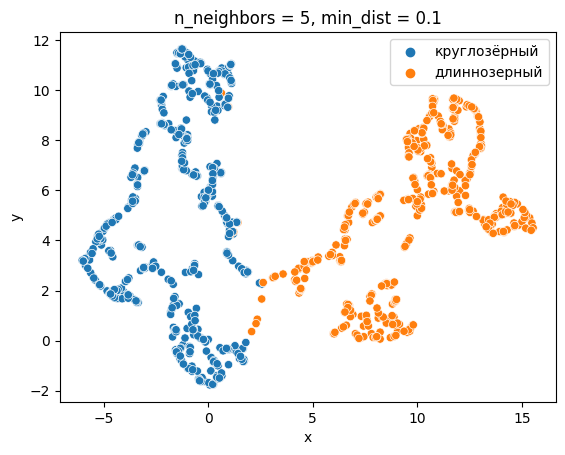

n_neighbors = 5, min_dist = 0.1 time = 2.578125


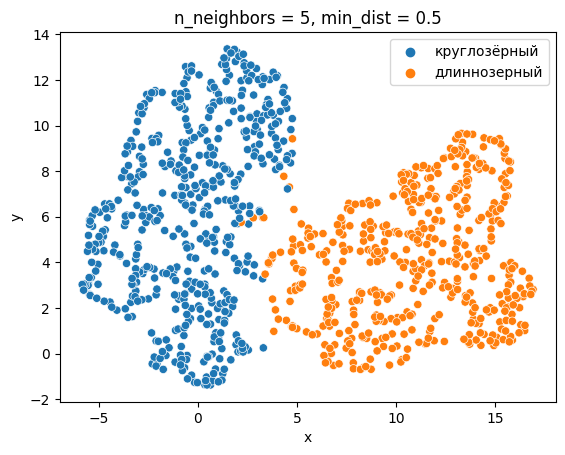

n_neighbors = 5, min_dist = 0.5 time = 2.8125


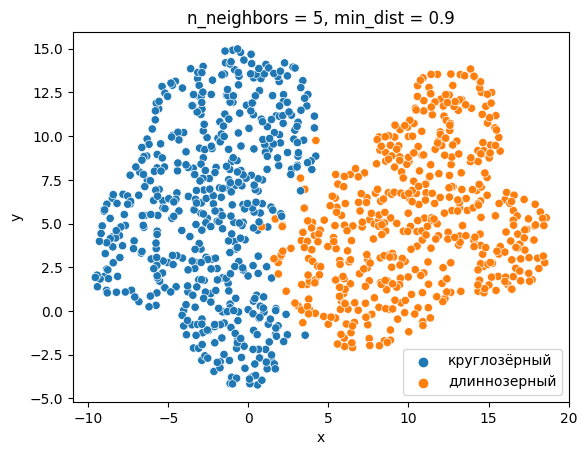

n_neighbors = 5, min_dist = 0.9 time = 2.1875


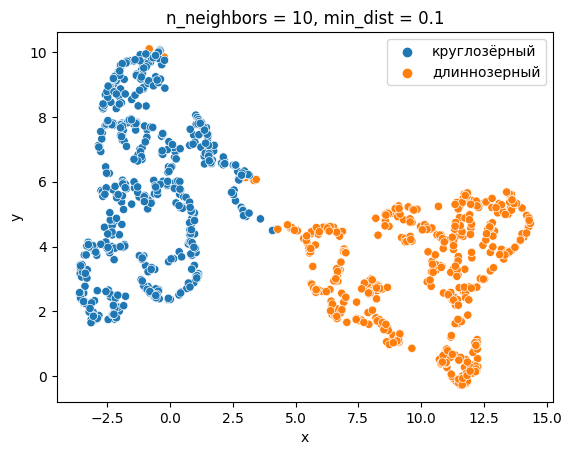

n_neighbors = 10, min_dist = 0.1 time = 2.859375


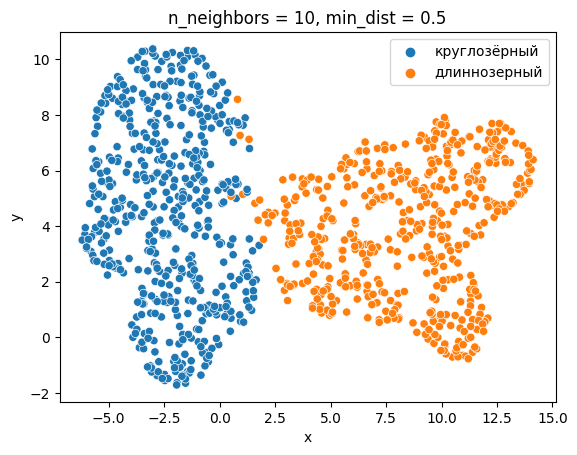

n_neighbors = 10, min_dist = 0.5 time = 2.859375


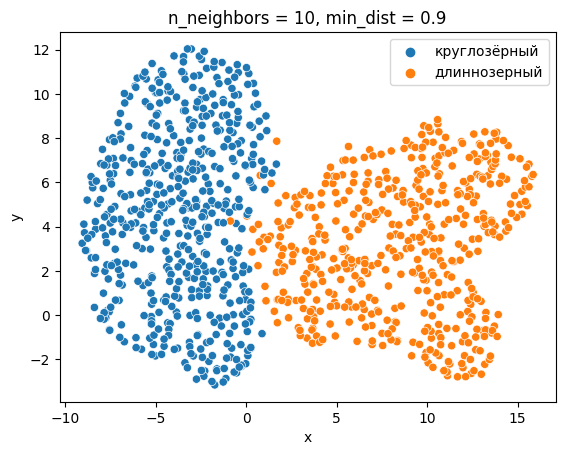

n_neighbors = 10, min_dist = 0.9 time = 2.875


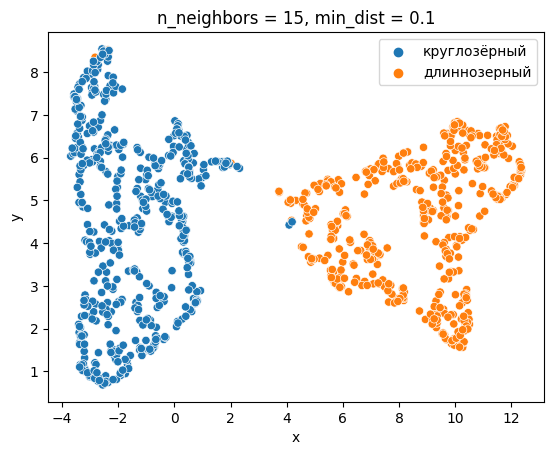

n_neighbors = 15, min_dist = 0.1 time = 3.28125


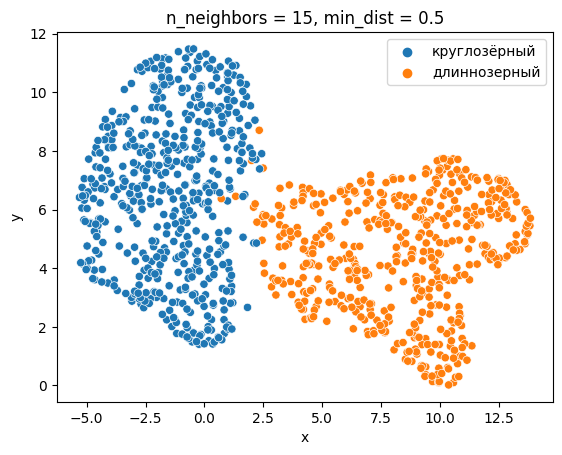

n_neighbors = 15, min_dist = 0.5 time = 2.984375


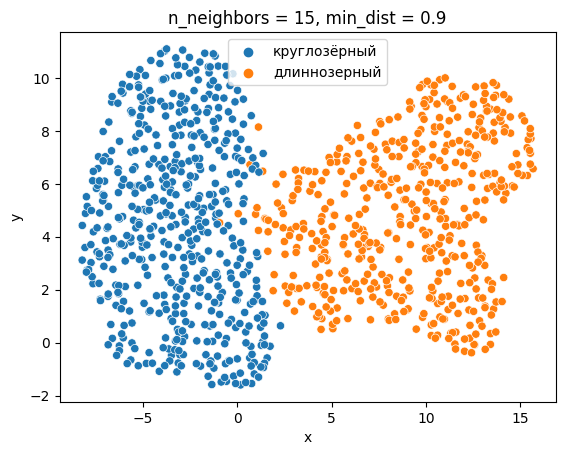

n_neighbors = 15, min_dist = 0.9 time = 2.96875


In [11]:
def show(DATA, n_neighbors, min_dist):
    u_data = DATA.copy()
    UM = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=123).fit_transform(u_data)
    u_data['x'] = UM[:,0]
    u_data['y'] = UM[:,1]
    fig = plt.figure()
    plt.title(f'n_neighbors = {n_neighbors}, min_dist = {min_dist}')
    sns.scatterplot(x='x', y='y', data=u_data, hue=['круглозёрный' if i == 1 else 'длиннозерный' for i in data['Class']])
    plt.show()
 

n_neighbors = [5, 10, 15]
min_dist = [0.1, 0.5, 0.9]

for i in n_neighbors:
    for j in min_dist:
        start = time.process_time()
        show(D,i,j)
        end = time.process_time()
        print(f'n_neighbors = {i}, min_dist = {j} time = {end-start}')